# Prepare Flood Locations data for DB

In [18]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from db_scripts.get_server_data import data_dir, db_filename
import pandas as pd
import sqlite3
import re

matplotlib.style.use('ggplot')
font_size = 14
params = {'legend.fontsize': font_size,
          'figure.figsize': (6, 4),
         'axes.labelsize': font_size,
         'axes.titlesize':font_size,
         'xtick.labelsize':font_size,
         'ytick.labelsize':font_size}
plt.rcParams.update(params)

### Read in the data

In [2]:
data_dir += "norfolk_flooded_roads_data/"

In [3]:
dtw = pd.read_csv(data_dir+'locations_with_dists_to_water_elevs.csv')

In [4]:
cds = pd.read_csv(data_dir+'STORM_data_flooded_streets_2010-2016_no_duplicates_clean_lat_lon.csv')

### Index by location name and subset to just columns we want

In [5]:
dtw.set_index('location_name', inplace=True)
cds.set_index('location', inplace=True)

In [6]:
cds = cds[['xcoord', 'ycoord', 'lon', 'lat']]

In [7]:
flood_counts = cds.index.value_counts()
flood_counts = flood_counts.rename('flood_count')

In [8]:
cds = cds[~cds.index.duplicated()]

In [9]:
print cds.shape
cds.head()

(747, 4)


,xcoord,ycoord,lon,lat
location,,,,
300 BLOCK OF SHIRLEY AVENUE,1.212926e+07,3.481753e+06,-76.290425,36.864399
LLEWELLYN AVENUE & SHIRLEY AVENUE,1.212972e+07,3.481566e+06,-76.288847,36.863856
LLEWELLYN AVENUE & W PRINCESS ANNE ROAD,1.212937e+07,3.480689e+06,-76.290115,36.861472
900 BLOCK OF TIDEWATER DRIVE,1.213392e+07,3.478090e+06,-76.274775,36.854041
CAMPOSTELLA ROAD & E BRAMBLETON AVENUE,1.213638e+07,3.474443e+06,-76.266674,36.843867


In [10]:
print dtw.shape
dtw.head()

(747, 4)


,elevation,distance_to_OW,distance_to_OW_EW,distance_to_OW_WW
location_name,,,,
100 BLOCK OF E CHARLOTTE STREET,2.36928,1936.406483,1936.406483,1936.406483
100 BLOCK OF E FREEMASON STREET,1.48384,1720.632547,1720.632547,1720.632547
100 BLOCK OF E WESTMONT AVENUE,3.29497,1673.917794,1394.487418,1226.916138
100 BLOCK OF FILBERT STREET,3.26233,1556.149031,1556.149031,1199.914194
100 BLOCK OF MEMORIAL PLACE,1.07364,165.280448,165.280448,165.280448


In [11]:
print flood_counts.shape
flood_counts.head()

(747L,)


E VIRGINIA BEACH BOULEVARD & TIDEWATER DRIVE    19
BOUSH STREET & W OLNEY ROAD                     12
4TH VIEW STREET & W OCEAN VIEW AVENUE           12
E VIRGINIA BEACH BOULEVARD & PARK AVENUE        11
LLEWELLYN AVENUE & SHIRLEY AVENUE                9
Name: flood_count, dtype: int64

In [12]:
sum(dtw.index.sort_values() != cds.index.sort_values())

0

### Join the tables

In [13]:
joined = cds.join(dtw)

In [14]:
joined = joined.join(flood_counts)
joined.head()

,xcoord,ycoord,lon,lat,elevation,distance_to_OW,distance_to_OW_EW,distance_to_OW_WW,flood_count
location,,,,,,,,,
300 BLOCK OF SHIRLEY AVENUE,1.212926e+07,3.481753e+06,-76.290425,36.864399,2.27047,3291.649848,3291.649848,3291.649848,5
LLEWELLYN AVENUE & SHIRLEY AVENUE,1.212972e+07,3.481566e+06,-76.288847,36.863856,2.15762,3305.283331,3305.283331,3305.283331,9
LLEWELLYN AVENUE & W PRINCESS ANNE ROAD,1.212937e+07,3.480689e+06,-76.290115,36.861472,2.31289,2368.435322,2368.435322,2368.435322,1
900 BLOCK OF TIDEWATER DRIVE,1.213392e+07,3.478090e+06,-76.274775,36.854041,1.73326,4374.592858,4456.503365,3139.348615,1
CAMPOSTELLA ROAD & E BRAMBLETON AVENUE,1.213638e+07,3.474443e+06,-76.266674,36.843867,3.46408,714.107730,540.656507,759.373034,2


In [15]:
con = sqlite3.connect(db_filename)
joined.to_sql(con=con, name='flood_locations', if_exists='replace')

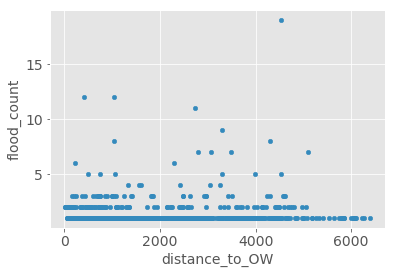

In [19]:
joined.plot.scatter('distance_to_OW', 'flood_count')

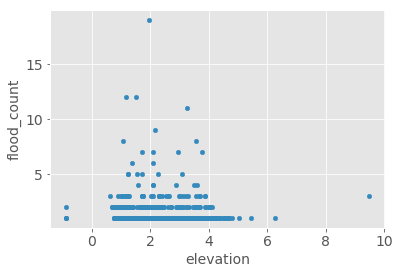

In [20]:
joined.plot.scatter('elevation', 'flood_count')